In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
df = pd.read_csv('../input/heart-disease-uci/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.target.unique()

array([1, 0])

In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
y = df['target']
X = df.drop(columns= ['target'])
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y)


In [7]:
para = list(range(3,10,2))
print(para)

[3, 5, 7, 9]


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , accuracy_score

results = {}  
for n in para:
    print('para =' , n )
    model = KNeighborsClassifier(n_neighbors= n)
    model.fit(X_train , y_train)
    preds =model.predict(X_test)
    accu =accuracy_score(y_true=y_test , y_pred=preds)
    print(classification_report(y_true=y_test, y_pred=preds))
    print('........................')
    results[n] = accu  

para = 3
              precision    recall  f1-score   support

           0       0.56      0.47      0.51        38
           1       0.55      0.63      0.59        38

    accuracy                           0.55        76
   macro avg       0.55      0.55      0.55        76
weighted avg       0.55      0.55      0.55        76

........................
para = 5
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        38
           1       0.57      0.66      0.61        38

    accuracy                           0.58        76
   macro avg       0.58      0.58      0.58        76
weighted avg       0.58      0.58      0.58        76

........................
para = 7
              precision    recall  f1-score   support

           0       0.60      0.47      0.53        38
           1       0.57      0.68      0.62        38

    accuracy                           0.58        76
   macro avg       0.58      0.58      0.57        

In [9]:
results

{3: 0.5526315789473685,
 5: 0.5789473684210527,
 7: 0.5789473684210527,
 9: 0.5789473684210527}

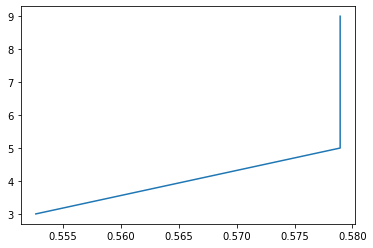

In [10]:
import matplotlib.pylab as plt
lists = sorted(results.items()) 
p,a = zip (*lists)
plt.plot(a,p)
plt.show()  

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , accuracy_score , f1_score

results = {}  
for n in para:
    print('para =' , n )
    model = KNeighborsClassifier(n_neighbors= n)
    model.fit(X_train , y_train)
    preds =model.predict(X_test)
    accu =accuracy_score(y_true=y_test , y_pred=preds)
    f1 =f1_score(y_true=y_test , y_pred=preds)
    print(classification_report(y_true=y_test, y_pred=preds))
    print('........................')
    results[n] = f1  

para = 3
              precision    recall  f1-score   support

           0       0.56      0.47      0.51        38
           1       0.55      0.63      0.59        38

    accuracy                           0.55        76
   macro avg       0.55      0.55      0.55        76
weighted avg       0.55      0.55      0.55        76

........................
para = 5
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        38
           1       0.57      0.66      0.61        38

    accuracy                           0.58        76
   macro avg       0.58      0.58      0.58        76
weighted avg       0.58      0.58      0.58        76

........................
para = 7
              precision    recall  f1-score   support

           0       0.60      0.47      0.53        38
           1       0.57      0.68      0.62        38

    accuracy                           0.58        76
   macro avg       0.58      0.58      0.57        

In [12]:
results

{3: 0.5853658536585366,
 5: 0.6097560975609756,
 7: 0.6190476190476191,
 9: 0.627906976744186}

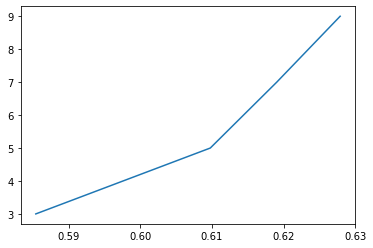

In [13]:
import matplotlib.pylab as plt
lists = sorted(results.items()) 
p,a = zip (*lists)
plt.plot(a,p)
plt.show()  

In [14]:
final_model = KNeighborsClassifier(n_neighbors= 5)
final_model.fit(X,y)

KNeighborsClassifier()